# 5.2 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

### 소규모 데이터셋?
- 보통 수백개에서 수만개의 데이터 수를 소규모 데이터셋이라고 함
- 컴퓨터 비전 작업에서는 소규모 데이터셋을 사용하는 경우가 흔함


### 소규모 데이터 셋을 이용한 컴퓨터 비전 이미지 분류 문제 수행 방법 3가지
1. 보유한 소규모 데이터셋을 사용해 처음부터 새로운 모델을 훈련하기(5.2절)
    - 작은 convnet을 regularization을 사용하지 않고 훈련해 기본 성능 모델 만들기
        - Overfitting이 주요 이슈
    - **Data Augmentation**을 이용해 성능 높이기
    

2. **사전 훈련된 네트워크에서 특성 추출하기**(5.3절)
3. **사전 훈련된 네트워크를 세밀하게 튜닝하기**(5.3절)

## 5.2.1 작은 데이터셋 문제에서 딥러닝의 타당성

### 데이터의 수

- 많은 데이터가 의미하는 것은 상대적이며 특히 **훈련하려는 네트워크의 크기와 깊이에 상대적**임
- 복잡한 문제를 푸는 컨브넷을 수십개의 샘플만 사용해서 훈련하는 것은 불가능
- **모델이 작고 regularization이 잘 되어 있으며 간단한 작업이라면 수백개의 샘플로도 충분할 수 있음**


### 딥러닝 모델의 재사용
- **대규모 데이터셋에서 훈련시킨 모델을 조금만 변경해서 완전히 다른 문제에 재사용 할 수 있음**
- 특히 컴퓨터 비전에서는 사전 훈련된 모델들이 많이 공개되어 있으므로 매우 적은 데이터에서 강력한 비전 모델을 만드는데 사용할 수 있음

## 5.2.2 데이터 내려받기

Kaggle의 Dogs vs. Cats dataset 사용
- https://www.kaggle.com/c/dogs-vs-cats/data
- 총 25000개의 데이터(강아지 12500개, 고양이 12500개)가 있음


사용할 데이터 수
- 총 2000개의 training set(class별 1000개)
- 총 1000개의 validation set(class별 500개)
- 총 1000개의 test set(class별 500개)

In [1]:
# 데이터셋 디렉토리 만들기

import os, shutil

dataset_origin = './datasets/cats_and_dogs/origin'

base_dir = './datasets/cats_and_dogs/small'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

save_dir = os.path.join(base_dir, 'saved_models')


if not os.path.isdir(save_dir) :
    os.mkdir(save_dir)

if not os.path.isdir(base_dir) :
    os.mkdir(base_dir)
    
if not os.path.isdir(train_dir) :
    os.mkdir(train_dir)
    
if not os.path.isdir(val_dir) :
    os.mkdir(val_dir)
    
if not os.path.isdir(test_dir) :
    os.mkdir(test_dir)

if not os.path.isdir(train_cats_dir) :
    os.mkdir(train_cats_dir)
    
if not os.path.isdir(train_dogs_dir) :
    os.mkdir(train_dogs_dir)
    
if not os.path.isdir(val_cats_dir) :
    os.mkdir(val_cats_dir)
    
if not os.path.isdir(val_dogs_dir) :
    os.mkdir(val_dogs_dir)
    
if not os.path.isdir(test_cats_dir) :
    os.mkdir(test_cats_dir)
    
if not os.path.isdir(test_dogs_dir) :
    os.mkdir(test_dogs_dir)

In [2]:
# 데이터 복사 

imgs = ["cat.{0}.jpg".format(i) for i in range(1000)]
for img in imgs:
    src = os.path.join(dataset_origin, img)
    dst = os.path.join(train_cats_dir, img)
    shutil.copy(src, dst)
    
imgs = ["cat.{0}.jpg".format(i) for i in range(1000, 1500)]
for img in imgs:
    src = os.path.join(dataset_origin, img)
    dst = os.path.join(val_cats_dir, img)
    shutil.copy(src, dst)
    
imgs = ["cat.{0}.jpg".format(i) for i in range(1500, 2000)]
for img in imgs:
    src = os.path.join(dataset_origin, img)
    dst = os.path.join(test_cats_dir, img)
    shutil.copy(src, dst)
    

imgs = ["dog.{0}.jpg".format(i) for i in range(1000)]
for img in imgs:
    src = os.path.join(dataset_origin, img)
    dst = os.path.join(train_dogs_dir, img)
    shutil.copy(src, dst)
    
imgs = ["dog.{0}.jpg".format(i) for i in range(1000, 1500)]
for img in imgs:
    src = os.path.join(dataset_origin, img)
    dst = os.path.join(val_dogs_dir, img)
    shutil.copy(src, dst)
    
imgs = ["dog.{0}.jpg".format(i) for i in range(1500, 2000)]
for img in imgs:
    src = os.path.join(dataset_origin, img)
    dst = os.path.join(test_dogs_dir, img)
    shutil.copy(src, dst)
    
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(val_cats_dir)))
print(len(os.listdir(val_dogs_dir)))
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

1000
1000
500
500
500
500


## 5.2.3 네트워크 구성하기

일반적인 구조의 간단한 Convnet을 만듦
- Conv2D, MaxPooling2D를 번갈아 쌓은 구조
- relu activation 사용
- feature map의 깊이는 점차 깊어짐
- feature map의 크기는 점차 감소

MNIST보다 이미지가 크고 복잡한 문제이므로 네트워크를 조금 더 크게 만듦
- Conv2D, MaxPooling2D을 하나씩 더 추가
    - Network의 용량은 증가
    - Flatten 후의 feature map 크기 감소


In [3]:
# Convnet

from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## 5.2.4 데이터 전처리

데이터 전처리 과정
1. 사진 파일 읽기
2. jpeg 콘텐츠를 RGB 픽셀 값으로 디코딩
3. float type의 텐서로 변환
4. 픽셀 값(0\~255)을 0\~1 사이로 조정

위 4가지 과정을 아래의 케라스의 도구들을 사용해 구현
- `keras.preprocessing.image`
    - 이미지 처리를 위한 helper 도구
    
    
- `ImageDataGenerator` 클래스
    - 디스크의 이미지 파일을 전처리된 배치 텐서로 바꾸어주는 파이썬 generator를 만들어 줌
    - iterator와 generator는 전체 항목을 미리 만들지 않으므로 메모리에 효율적
    
- `fit_generator()`
    - `fit()`과 동일하지만 generator를 사용할 수 있음
    - `steps_per_epoch` 매개변수
        - 하나의 epoch당 뽑을 batch 수
        - 한 epoch마다 `steps_per_epoch`개의 batch만큼 뽑은 후 `steps_per_epoch` 횟수 만큼 경사하강법 단계를 실행
    - `validation_data` 매개변수
        - 검증 데이터를 generator로 전달
        - `steps_per_epoch`마찬가지로 `validation_steps` 매개변수를 통해 하나의 epoch당 뽑을 검증 데이터의 batch 수 지정

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# ImageDataGenerator.flow_from_directory()에 전달된 매개변수 설명
# train_dir : target 디렉토리, 각 클래스 이름으로 된 디렉토리들이 있음
# target_size=(150, 150) : 이미지를 150x150 크기로 바꿈
# class_mode : 이진분류 - 'binary'
#              다중분류(one-hot encoding) - 'categorical'
#              다중분류(정수 레이블) - 'sparse'

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

    
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, # 1epoch당 100번의 batch : 1epoch당 총 20*100 = 2000개
    epochs=30,
    validation_data=val_generator,
    validation_steps=50 # 1epoch당 50번의 batch : 1epoch당 총 20*50 = 2000개
)

Epoch 1/30
100/100 [==============================] - 6s 57ms/step - loss: 0.6848 - acc: 0.5530 - val_loss: 0.6992 - val_acc: 0.6130
Epoch 2/30
100/100 [==============================] - 5s 46ms/step - loss: 0.6430 - acc: 0.6410 - val_loss: 0.6348 - val_acc: 0.6730
Epoch 3/30
100/100 [==============================] - 5s 46ms/step - loss: 0.5908 - acc: 0.6795 - val_loss: 0.5988 - val_acc: 0.6700
Epoch 4/30
100/100 [==============================] - 5s 46ms/step - loss: 0.5542 - acc: 0.7145 - val_loss: 0.4519 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 5s 46ms/step - loss: 0.5349 - acc: 0.7200 - val_loss: 0.5841 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 5s 45ms/step - loss: 0.5029 - acc: 0.7550 - val_loss: 0.5248 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 5s 45ms/step - loss: 0.4709 - acc: 0.7790 - val_loss: 0.6499 - val_acc: 0.6730
Epoch 8/30
100/100 [==============================] - 5s 47ms/step - 

In [7]:
model.save(os.path.join(save_dir, 'cats_and_dogs_small_1.h5'))

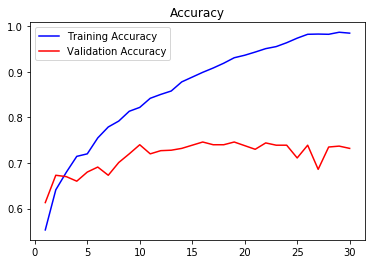

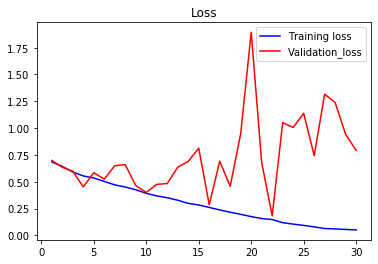

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation_loss')
plt.title('Loss')
plt.legend()

plt.show()

**결과 분석**
- Overfitting이 일어남
    - 훈련 샘플의 수가 적어서 Overfitting이 가장 중요한 문제


## 5.2.5 데이터 증식(Data Augmentation) 사용하기

### 데이터 증식
- 위 결과의 Overfitting은 **학습 샘플이 너무 적어 다양한 여러 측면을 모두 학습할 수 없었기 때문**에 발생하였으며 데이터 증식은 이를 해결할 수 있는 방법 중 하나임(적은 데이터셋의 경우 거의 필수처럼 사용)


- 데이터 증식이란 **기존 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법**
- 케라스의 `ImageDataGenerator`를 사용해 구현

`ImageDataGenerator`의 매개변수들
- `rotation_range`
    - 랜덤하게 사진을 회전시킬 각도 범위
- `width_shift_range`, `height_shift_range`
    - 각각 수평, 수직으로 랜덤하게 평행이동 시킬 범위
- `shear_range`
    - 랜덤하게 전단 변환을 적용할 각도 범위
    - rotation_range로 회전할 때 y축 방향으로 각도를 증가시켜 이미지를 변형
- `zoom_range`
    - 랜덤하게 사진을 확대할 범위
- `horizontal_flip`
    - 랜덤하게 이미지를 수평으로 뒤집음
- `fill_mode`
    - 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 방법

In [9]:
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1, 
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

(1, 150, 150, 3)


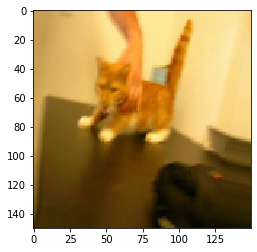

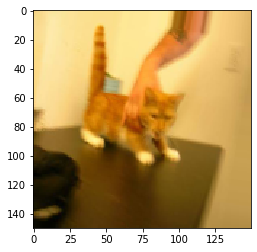

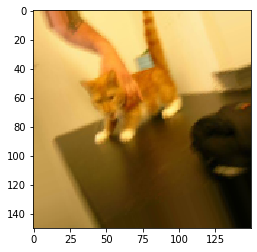

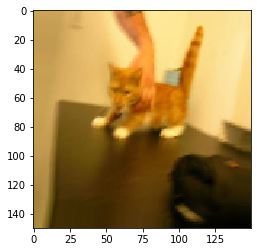

In [10]:
# 랜덤하게 증식된 이미지 확인

from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

print(x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

        
plt.show()

### 데이터 증식의 한계와 regularization 적용

- 데이터 증식은 적은 수의 원본 이미지에서 만들어 졌기 때문에 여전히 입력 데이터들과의 상호 연관성이 큼
- 즉 **새로운 정보를 만들어 낼 수 없고 단지 기존 정보의 재조합만 가능함**
- 따라서 데이터 증식과 여러 regularization 기법을 같이 사용하는 것이 좋음

In [11]:
# Data Augmetation + Dropout 적용

model_aug_dropout = models.Sequential()

model_aug_dropout.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model_aug_dropout.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_aug_dropout.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_aug_dropout.add(layers.MaxPooling2D(pool_size=(2, 2)))

model_aug_dropout.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))                
model_aug_dropout.add(layers.MaxPooling2D(pool_size=(2, 2)))
                      
model_aug_dropout.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))               
model_aug_dropout.add(layers.MaxPooling2D(pool_size=(2, 2)))
                      
model_aug_dropout.add(layers.Flatten())
model_aug_dropout.add(layers.Dropout(0.5))
                      
model_aug_dropout.add(layers.Dense(512, activation='relu'))
model_aug_dropout.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [12]:
model_aug_dropout.compile(loss='binary_crossentropy',
                          optimizer=optimizers.RMSprop(lr=1e-4),
                          metrics=['acc'])

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(150, 150),
                                                batch_size=20,
                                                class_mode='binary')

history_aug_dropout = model_aug_dropout.fit_generator(train_generator,
                                                      steps_per_epoch=100,
                                                      epochs=100,
                                                      validation_data=val_generator,
                                                      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 12s 118ms/step - loss: 0.6953 - acc: 0.4950 - val_loss: 0.7229 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 11s 105ms/step - loss: 0.6873 - acc: 0.5370 - val_loss: 0.6010 - val_acc: 0.5250
Epoch 3/100
100/100 [==============================] - 11s 107ms/step - loss: 0.6723 - acc: 0.5895 - val_loss: 0.6967 - val_acc: 0.5390
Epoch 4/100
100/100 [==============================] - 11s 108ms/step - loss: 0.6537 - acc: 0.6005 - val_loss: 0.5589 - val_acc: 0.5830
Epoch 5/100
100/100 [==============================] - 11s 109ms/step - loss: 0.6346 - acc: 0.6310 - val_loss: 0.6094 - val_acc: 0.6320
Epoch 6/100
100/100 [==============================] - 10s 104ms/step - loss: 0.6241 - acc: 0.6475 - val_loss: 0.5935 - val_acc: 0.6590
Epoch 7/100
100/100 [==============================] - 11s 107ms/step - loss: 0.6154 - acc: 0.6595 -

In [13]:
model_aug_dropout.save(os.path.join(save_dir, 'cats_and_dogs_small_2.h5'))

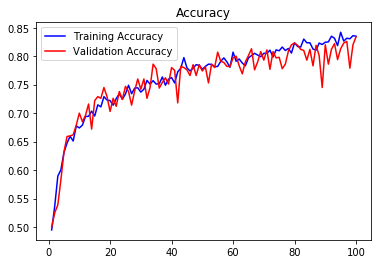

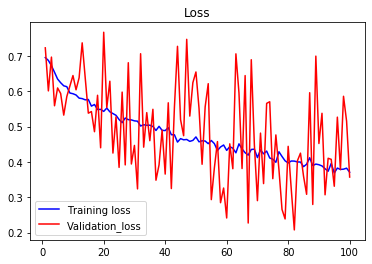

In [14]:
import matplotlib.pyplot as plt

acc = history_aug_dropout.history['acc']
val_acc = history_aug_dropout.history['val_acc']
loss = history_aug_dropout.history['loss']
val_loss = history_aug_dropout.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation_loss')
plt.title('Loss')
plt.legend()

plt.show()

**결과 분석**
- Overfitting이 줄어듦
- 추가로 다른 regularization 기법 적용 및 하이퍼파라미터 튜닝을 하면 더 정확도를 높일 수 있음
- 하지만 **데이터 자체가 적기 때문에 이런식으로 처음부터 구현해서 하는 방법으로는 더 높이기 어려움**
- **pre-trained 모델을 사용하는 것이 더 좋음**(5.3절 내용)